In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata_dir = "data_level_1/adata/"
he_image_dir = "data_level_1/he_registered_old/"

In [6]:
sample = 'X17'
# adata = sc.read_h5ad(adata_dir + f'{sample}.h5ad')
he_image = plt.imread(he_image_dir + f'{sample}.tiff')

In [7]:
slide_id = adata.obs['Slide_ID'][0]
adata.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
adata.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

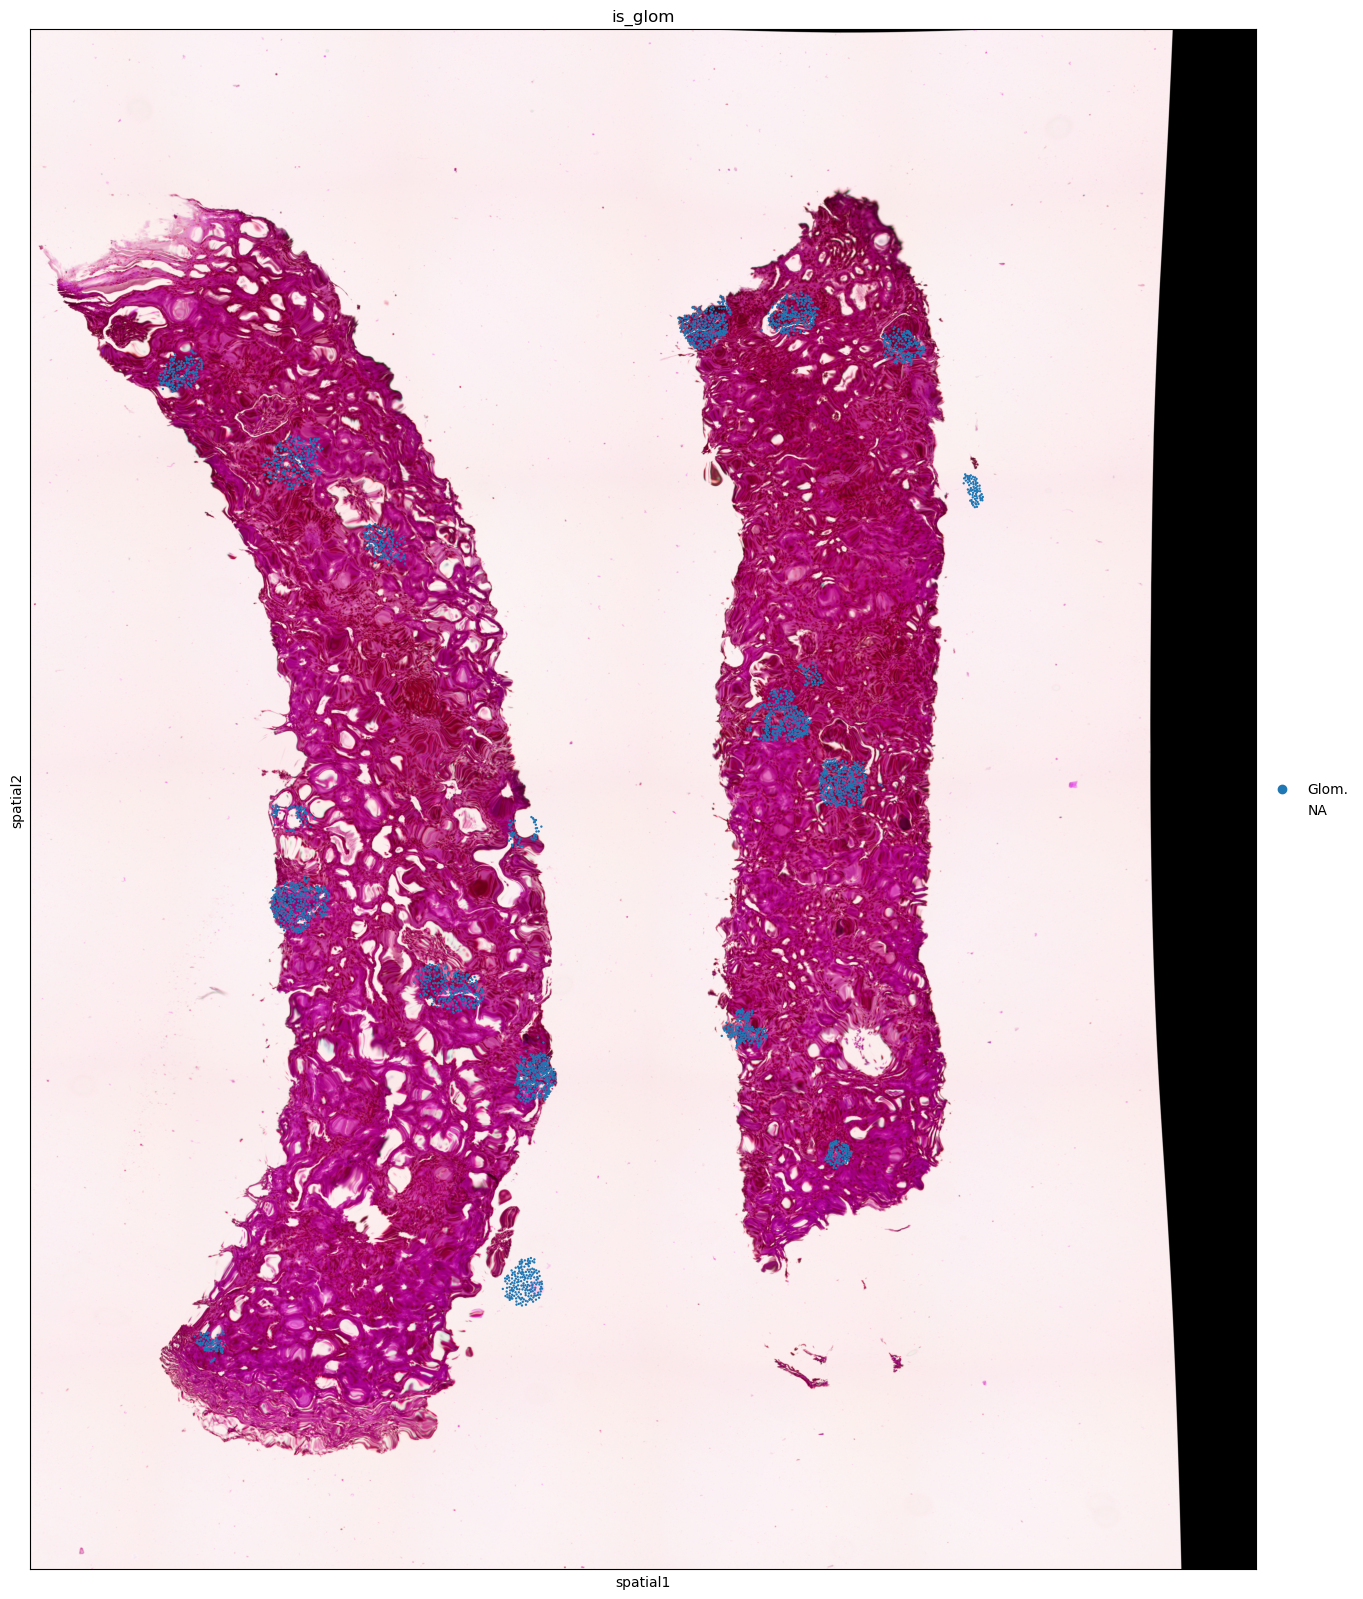

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))

adata.obs['is_glom'] = ['Glom.' if i=='Glom.' else np.nan for i in adata.obs['nichepca_domain_tuned']]

sc.pl.spatial(adata,
              library_id = slide_id,
              img_key = 'he_downscaled_aligned',
              color = 'is_glom',
              size = .2,
              ax = ax,
              show = True)

In [28]:
adata_dir = "data_level_1/adata/"
he_image_dir = "data_level_1/he_registered_old/"
save_dir = "data_level_1/adata_with_he/"

In [ ]:
for sample in tqdm(range(1:57)):

    sample = f"X{sample}"
    adata = sc.read_h5ad(adata_dir + f'{sample}.h5ad')
    he_image = plt.imread(he_image_dir + f'{sample}.tiff')

    slide_id = adata.obs['Slide_ID'][0]
    adata.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
    adata.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

    adata.write_h5ad(save_dir + f'{sample}.h5ad')